<a href="https://colab.research.google.com/github/AyusheeMittal/legendary-guide/blob/master/fellowship.ai/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import logging
import os
import PIL

from collections import OrderedDict
from pathlib import Path 
from scipy import io
from torchsummary import summary
from torchvision.utils import make_grid
from torch.optim.lr_scheduler import StepLR
from torchvision import transforms
from torchvision.utils import make_grid
 
logger=logging.getLogger()

In [2]:
! wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
! wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

--2021-02-08 13:02:47--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/x-gzip]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  35.2MB/s    in 9.9s    

2021-02-08 13:02:57 (33.3 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]

--2021-02-08 13:02:57--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502
Saving to: ‘imagelabels.mat’

imagelabels.mat     100%[===================>]     502  --.-KB/s    in 0s      

2021-02-08 13:02:58 (108 MB/s) - ‘imagelabels.mat’ saved [

In [3]:
! mkdir images

In [4]:
!tar -xvf  '102flowers.tgz' -C images

Streaming output truncated to the last 5000 lines.
jpg/image_02266.jpg
jpg/image_00062.jpg
jpg/image_05821.jpg
jpg/image_03712.jpg
jpg/image_01142.jpg
jpg/image_03033.jpg
jpg/image_05760.jpg
jpg/image_02732.jpg
jpg/image_00183.jpg
jpg/image_05264.jpg
jpg/image_03778.jpg
jpg/image_07061.jpg
jpg/image_04468.jpg
jpg/image_00676.jpg
jpg/image_07610.jpg
jpg/image_02192.jpg
jpg/image_05112.jpg
jpg/image_05638.jpg
jpg/image_00053.jpg
jpg/image_02451.jpg
jpg/image_05857.jpg
jpg/image_08033.jpg
jpg/image_03902.jpg
jpg/image_07494.jpg
jpg/image_02357.jpg
jpg/image_05496.jpg
jpg/image_04496.jpg
jpg/image_07538.jpg
jpg/image_01801.jpg
jpg/image_00326.jpg
jpg/image_07644.jpg
jpg/image_01199.jpg
jpg/image_01168.jpg
jpg/image_07020.jpg
jpg/image_05006.jpg
jpg/image_03484.jpg
jpg/image_02825.jpg
jpg/image_04549.jpg
jpg/image_02011.jpg
jpg/image_04360.jpg
jpg/image_06847.jpg
jpg/image_07695.jpg
jpg/image_03540.jpg
jpg/image_08058.jpg
jpg/image_01230.jpg
jpg/image_00096.jpg
jpg/image_01517.jpg
jpg/image

In [5]:
labels = io.loadmat('imagelabels.mat')
labels

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009',
 '__version__': '1.0',
 'labels': array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)}

In [6]:
labels['labels'][0].size

8189

In [7]:
type(labels['labels'][0])

numpy.ndarray

In [8]:
labels = labels['labels'][0] 

In [9]:
np.unique(labels)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102], dtype=uint8)

In [10]:
import pandas as pd
df = pd.DataFrame(labels)

In [11]:
df.value_counts()

51    258
77    251
46    196
73    194
89    184
     ... 
7      40
45     40
34     40
27     40
1      40
Length: 102, dtype: int64

In [12]:
cat_to_name = {21: "fire lily", 3: "canterbury bells", 45: "bolero deep blue", 1: "pink primrose", 
               34: "mexican aster", 27: "prince of wales feathers", 7: "moon orchid", 16: "globe-flower", 
               25: "grape hyacinth", 26: "corn poppy", 79: "toad lily", 39: "siam tulip", 
               24: "red ginger", 67: "spring crocus", 35: "alpine sea holly", 32: "garden phlox", 
               10: "globe thistle", 6: "tiger lily", 93: "ball moss", 33: "love in the mist", 
               9: "monkshood", 102: "blackberry lily", 14: "spear thistle", 19: "balloon flower", 
               100: "blanket flower", 13: "king protea", 49: "oxeye daisy", 15: "yellow iris", 
               61: "cautleya spicata", 31: "carnation", 64: "silverbush", 68: "bearded iris", 
               63: "black-eyed susan", 69: "windflower", 62: "japanese anemone", 20: "giant white arum lily", 
               38: "great masterwort", 4: "sweet pea", 86: "tree mallow", 101: "trumpet creeper", 
               42: "daffodil", 22: "pincushion flower", 2: "hard-leaved pocket orchid", 54: "sunflower", 
               66: "osteospermum", 70: "tree poppy", 85: "desert-rose", 99: "bromelia", 87: "magnolia", 
               5: "english marigold", 92: "bee balm", 28: "stemless gentian", 97: "mallow", 57: "gaura", 
               40: "lenten rose", 47: "marigold", 59: "orange dahlia", 48: "buttercup", 
               55: "pelargonium", 36: "ruby-lipped cattleya", 91: "hippeastrum", 29: "artichoke", 
               71: "gazania", 90: "canna lily", 18: "peruvian lily", 98: "mexican petunia", 
               8: "bird of paradise", 30: "sweet william", 17: "purple coneflower", 52: "wild pansy", 
               84: "columbine", 12: "colt's foot", 11: "snapdragon", 96: "camellia", 
               23: "fritillary", 50: "common dandelion", 44: "poinsettia", 53: "primula", 
               72: "azalea", 65: "californian poppy", 80: "anthurium", 76: "morning glory", 
               37: "cape flower", 56: "bishop of llandaff", 60: "pink-yellow dahlia", 82: "clematis", 
               58: "geranium", 75: "thorn apple", 41: "barbeton daisy", 95: "bougainvillea", 
               43: "sword lily", 83: "hibiscus", 78: "lotus lotus", 88: "cyclamen", 
               94: "foxglove", 81: "frangipani", 74: "rose", 89: "watercress", 
               73: "water lily", 46: "wallflower", 77: "passion flower", 51: "petunia"}

In [13]:
values = []
for i in range(0, 8189):
  values.append(cat_to_name.get(labels[i]))

values

['passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion fl

In [14]:
IS_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if IS_CUDA else "cpu")

# Constants, put in config
epochs = 10
cuda_batch_size=128
cpu_batch_size = 4
num_workers = 4

In [15]:
def show_model_summary(model, input_size):
    result = summary(model, input_size=input_size)
    print(result)

In [16]:
def freeze_parameters(root, freeze=True):
    [param.requires_grad_(not freeze) for param in root.parameters()]

In [17]:
def create_classifier(input_size, output_size):
    dict = OrderedDict()
    dict['layer0'] = nn.Linear(input_size, 256)
    dict['activ0'] = nn.ReLU()
    dict['drop_0'] = nn.Dropout(0.5)
            
    dict['output'] = nn.Linear(256, output_size)
    dict['output_function'] = nn.LogSoftmax(dim=1)
    
    return nn.Sequential(dict)

In [18]:
model = torchvision.models.resnet34(pretrained=True, progress=True)
model.fc = create_classifier(512, 102)
model = model.to(DEVICE)
print(model)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

In [19]:
show_model_summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [-1, 6

In [20]:
class FlowersDataset(torch.utils.data.Dataset):

    def __init__(self, root, image_dir, label_file, transform=None):
        self.root = root
        self.image_dir = image_dir
        self.image_files = os.listdir(image_dir)
        self.data = io.loadmat(label_file)['labels'][0] - 1
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image_name = os.path.join(self.image_dir, self.image_files[index])  
        image = PIL.Image.open(image_name)
        subname = int(image_name[27:31]) - 1
        label = int(self.data[subname])
        
        #print(image_name, label, subname)
        if self.transform:
            image = self.transform(image)
        return (image, label)

In [21]:
root = Path(os.getcwd())
image_dir = root/'images/jpg'
label_file = root/'imagelabels.mat'

transform = transforms.Compose([
          transforms.Resize([225,225]),
          transforms.CenterCrop(224),
          transforms.ToTensor(),
          transforms.RandomHorizontalFlip(),
          transforms.RandomVerticalFlip(),
          transforms.RandomRotation(90),
          transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
          ])

dset = FlowersDataset(root, image_dir, label_file, transform= transform)
train_dataset, test_dataset = torch.utils.data.random_split(dset, [6000, 2189])

dataloader_args = dict(shuffle=True, batch_size=cuda_batch_size, num_workers=num_workers, pin_memory=True) if IS_CUDA else dict(shuffle=True, batch_size=cpu_batch_size)

trainloader = torch.utils.data.DataLoader(train_dataset, **dataloader_args)  
testloader = torch.utils.data.DataLoader(test_dataset, **dataloader_args)  

In [22]:
def imshow(img, labels):
    img = img.numpy()
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    fig = plt.figure(figsize=(25, 10))
    fig_rows, fig_cols = 4, 16

    for index in np.arange(fig_rows*fig_cols):
      image = img[index]
      label = labels[index].item() + 1
      title = f'{label}'
      ax = fig.add_subplot(fig_rows, fig_cols, index+1, xticks=[], yticks=[])
      for i in range(image.shape[0]):
        image[i] = image[i] * std[i] + mean[i]

      ax.imshow(np.transpose(image, (1, 2, 0)))
      ax.set_title(title)

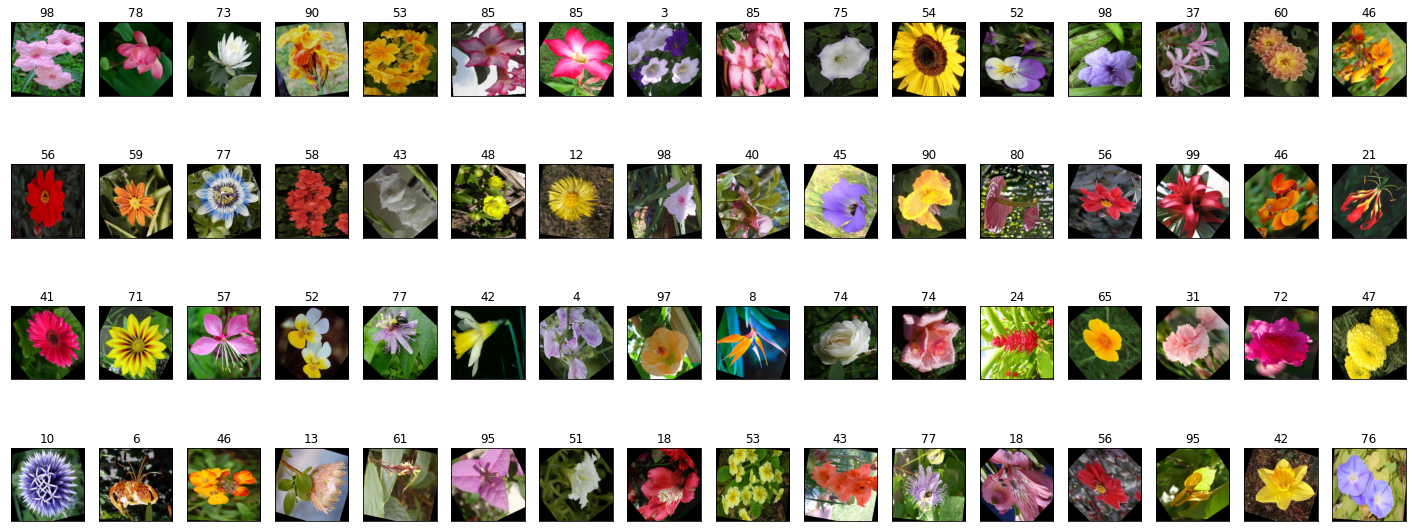

In [23]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
#print(images.shape, labels +1 , labels.shape)
imshow(images, labels) #torchvision.utils.make_grid(images)

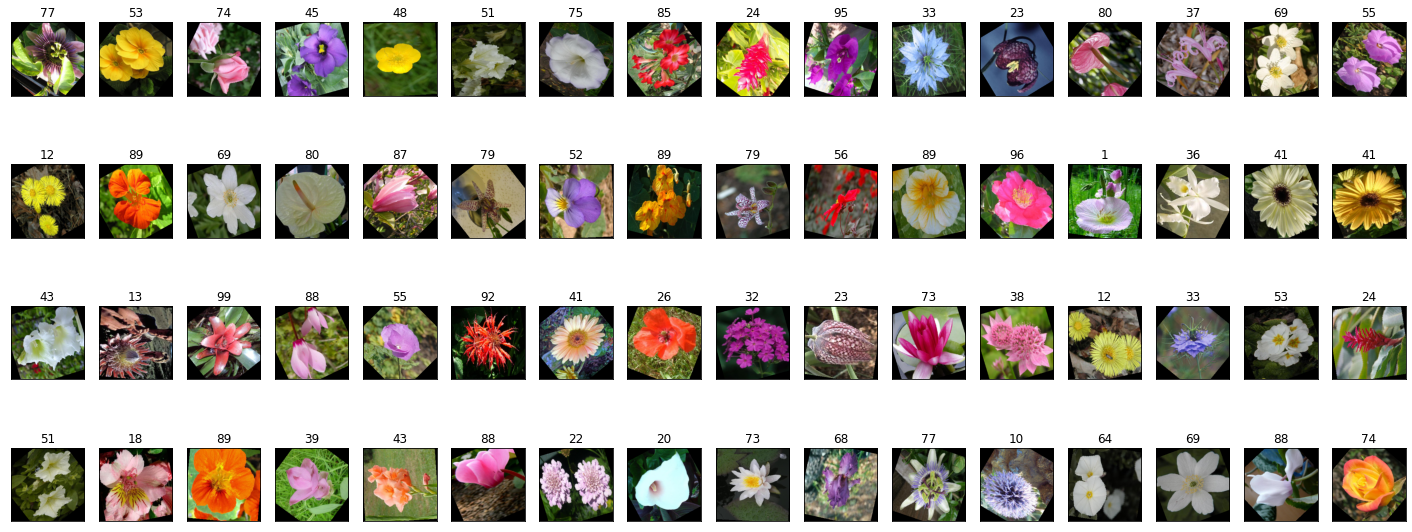

In [24]:
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(images, labels)

In [25]:
def train_loop(epochs, trainloader, model, device, optimizer, criterion, scheduler=None, stepWithLoss=False):

    for epoch in range(epochs):  # loop over the dataset multiple times
        model.train()
        running_loss = 0.0
        running_corrects = 0
        processed = 0
        for i, (data, labels) in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)

            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item() #loss.data[0]
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data).item()
            processed += len(data)

        print('Epoch [%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss))
        print("Accuracy: ", 100.0*running_corrects/processed) 

        if scheduler:
            if stepWithLoss:
                scheduler.step(loss)
            else:
                scheduler.step()

In [26]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                   factor=0.1, patience=2,
                                                   threshold=0.01, min_lr=0.00001)

#freeze_parameters(model)
freeze_parameters(model, False)
train_loop(5, trainloader, model, DEVICE, optimizer, criterion, scheduler, True)


#optimizer2 = optim.SGD(model.parameters(), lr=0.0001, weight_decay=0.001)
#freeze_parameters(model, False)
#train_loop(2, trainloader, model, DEVICE, optimizer2, criterion)

#scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[0], gamma=0.01)
#freeze_parameters(model)
#freeze_parameters(model.fc, False)
#train_loop(1, trainloader, model, DEVICE, optimizer, criterion, scheduler, True)

Epoch [1,    47] loss: 207.342
Accuracy:  7.033333333333333
Epoch [2,    47] loss: 172.583
Accuracy:  21.1
Epoch [3,    47] loss: 134.410
Accuracy:  34.85
Epoch [4,    47] loss: 107.285
Accuracy:  45.46666666666667
Epoch [5,    47] loss: 88.549
Accuracy:  53.55


In [27]:
def test_loop(testloader, model, device, criterion):
    correct = 0
    total = 0
    running_loss = 0
    loss_accumulator = []
    acc_accumulator = []
    model.eval()
    with torch.no_grad():
        for data, label in testloader:
            images, labels = data.to(device), label.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
    print('Accuracy of the network on the test images: %d %%, Test loss:' % (
            100.0 * correct / total), running_loss)
    

In [28]:
test_loop(testloader, model, DEVICE, criterion)

Accuracy of the network on the test images: 69 %, Test loss: 25.1668142080307
